In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
# importing the data above this directory

filename = '/Users/user/Desktop/Flying-Car-and-Autonomous-Flight-Engineer-ND/2-Motion_Planning/colliders.csv'
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)

In [3]:

import os, sys
sys.path.append('../..')
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('/Users/user/Desktop/Flying-Car-and-Autonomous-Flight-Engineer-ND/2-Motion_Planning/planning_utils.py'))))
import planning_utils_seed_project
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('/Users/user/Desktop/Flying-Car-and-Autonomous-Flight-Engineer-ND/2-Motion_Planning/motion_planning_seed_project.py'))))
import planning_utils
from udacidrone.frame_utils import global_to_local, local_to_global

In [4]:
TARGET_ALTITUDE, SAFETY_DISTANCE = 5, 5
global_home = np.array([-123.36353, 36.69248, 0.0])
global_position = np.array([-121.3772513, 36.7784709, 0.147])
grid, north_offset, east_offset  = planning_utils.create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
local_position = global_to_local(global_position, global_home)
grid_start_north = int(np.ceil(local_position[0] - north_offset))
grid_start_east = int(np.ceil(local_position[1] - east_offset))
grid_start = (grid_start_north, grid_start_east)

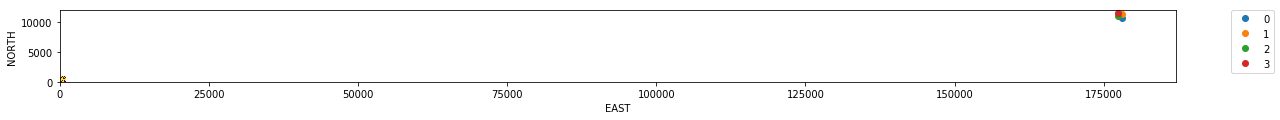

0 (10772, 178130) [-121.37281132   36.77616371   -0.147     ]
1 (11422, 178130) [-121.37268747   36.78202094   -0.147     ]
2 (11017, 177330) [-121.38172628   36.77849371   -0.147     ]
3 (11492, 177330) [-121.38163626   36.78277401   -0.147     ]


In [5]:
goals = [
    (grid_start[0] - 250, grid_start[1] + 400),
    (grid_start[0] + 400, grid_start[1] + 400),
    (grid_start[0] - 5, grid_start[1] - 400),
    (grid_start[0] + 470, grid_start[1] - 400)
]
fig = plt.figure(figsize=(20,10))   
plt.imshow(grid, origin='lower') 
plt.plot(grid_start[1], grid_start[0], 'r+')
for goal, index in zip(goals, range(4)):
    north, east = goal
    plt.plot(east, north, 'o', label=f'{index}')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()
global_goals = list(map(lambda g: local_to_global(np.array([g[0] + north_offset, g[1] + east_offset, 0.147]), global_home), goals))
for g, gg, index in zip(goals, global_goals, range(4)):
    print(f'{index} {g} {gg}')

In [6]:
def square_a_star(g, start, goal):
    """
    A * implementation with NORTH, SOUTH, EAST, WEST
    """
    return planning_utils_seed_project.a_star(g, planning_utils_seed_project.heuristic, start, goal)

def diagonals_a_star(g, start, goal):
    """
    A * implementation with NORTH, SOUTH, EAST, WEST and diagonals
    """
    return planning_utils.a_star(g, planning_utils.heuristic, start, goal)

def prune_unity(path):
    """
    Unity function for pruning the path.
    """
    return path
    